In [1]:
import xarray as xr
import xesmf as xe
import numpy as np 
import pathlib as pl
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/swedata/og_grid/ASO_250M_SWE_bilin_20190331_latlon.nc")

In [7]:
wrfinfile = "/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/wrfinput_d01.nc"
target_wrfinput_file = xr.open_dataset(wrfinfile)
target_wrfinput_file = target_wrfinput_file.rename({'XLONG': 'lon', 'XLAT': 'lat'})
target_wrfinput_file['lat'] = target_wrfinput_file['lat'][0,:,:]
target_wrfinput_file['lon'] = target_wrfinput_file['lon'][0,:,:]

In [17]:
ds = ds.rename({"lat":"latitude", "lon":"longitude"})

In [22]:
target_wrfinput_file.lat

<xarray.DataArray 'lat' (south_north: 239, west_east: 179)>
array([[38.61014 , 38.610146, 38.610146, ..., 38.610146, 38.610146, 38.61014 ],
       [38.61239 , 38.61239 , 38.6124  , ..., 38.6124  , 38.61239 , 38.61239 ],
       [38.61464 , 38.614643, 38.614655, ..., 38.614655, 38.614643, 38.61464 ],
       ...,
       [39.140816, 39.140823, 39.140835, ..., 39.140835, 39.140823, 39.140816],
       [39.143066, 39.14307 , 39.14308 , ..., 39.14308 , 39.14307 , 39.143066],
       [39.145313, 39.14532 , 39.145325, ..., 39.145325, 39.14532 , 39.145313]],
      dtype=float32)
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    units:        degrees latitude
    description:  Latitude on mass grid
    stagger:      M
    sr_x:         1
    sr_y:         1

In [24]:
rg = xe.Regridder(ds, target_wrfinput_file, 'bilinear')

In [26]:
swe_regrid = rg(ds.Band1)

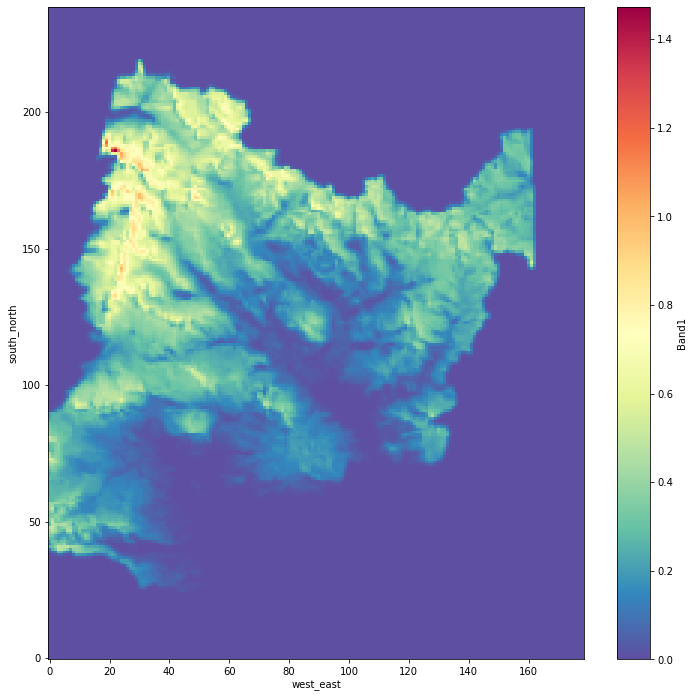

In [31]:
fig,ax = plt.subplots(1)
fig.set_size_inches(12,12)
swe_regrid.plot(ax=ax, cmap="Spectral_r")